In [1]:
%matplotlib inline

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 4)})
np.random.seed(9221999)

### basic visualization with histograms

(array([  2.,   3.,   3.,   9.,  12.,  16.,  12.,   6.,   5.,   7.]),
 array([-2.38310441, -1.98262461, -1.5821448 , -1.18166499, -0.78118519,
        -0.38070538,  0.01977443,  0.42025424,  0.82073404,  1.22121385,
         1.62169366]),
 <a list of 10 Patch objects>)

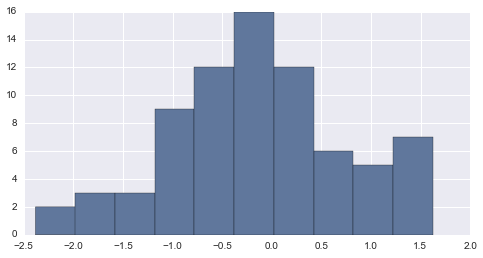

In [4]:
data = randn(75)
plt.hist(data)

`hist` separates data into 10 bins of equal widths

(array([  3.,  10.,  16.,  24.,  13.,   9.]),
 array([-2.38310441, -1.71563807, -1.04817172, -0.38070538,  0.28676097,
         0.95422731,  1.62169366]),
 <a list of 6 Patch objects>)

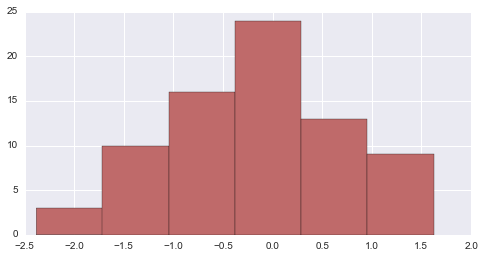

In [5]:
plt.hist(data, 6, color=sns.desaturate('indianred', .75))

`normed` compare two distributions
`bins` can be a sequence of where each bin starts

(array([ 0.01 ,  0.02 ,  0.095,  0.155,  0.18 ,  0.18 ,  0.135,  0.12 ,
         0.055,  0.025,  0.02 ,  0.   ,  0.005]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.]),
 <a list of 13 Patch objects>)

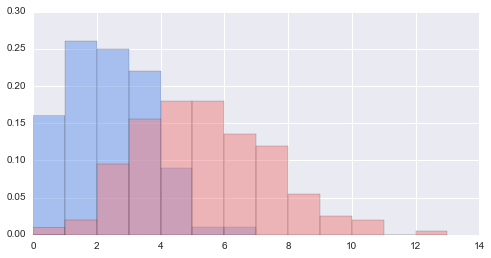

In [6]:
data1 = stats.poisson(2).rvs(100)
data2 = stats.poisson(5).rvs(200)
max_data = np.r_[data1, data2].max()
bins = np.linspace(0, max_data, max_data + 1)
plt.hist(data1, bins, normed=True, color='#6495ED', alpha=.5)
plt.hist(data2, bins, normed=True, color='#F08080', alpha=.5)

(array([  14.,   68.,  126.,  158.,  203.,  247.,  254.,  276.,  300.,
         286.,  275.,  276.,  242.,  247.,  224.,  203.,  203.,  169.,
         142.,  138.,  127.,  119.,   75.,   77.,   71.,   58.,   44.,
          63.,   44.,   41.,   40.,   37.,   19.,   22.,   29.,    6.,
           9.,    7.,    4.,   10.,   11.,    7.,    4.,    3.,    2.,
           3.,    2.,    4.,    3.,    1.,    1.,    2.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  0.09250355,   0.30630578,   0.52010801,   0.73391024,
          0.94771247,   1.1615147 ,   1.37531692,   1.58911915,
          1.80292138,   2.01672361,   2.23052584,   2.44432807,
          2.65813029,   2.87193252,   3.08573475,   3.29953698,
          3.51333921,   3.72714144,   3.94094367,   4.15474589,
          4.36854812,   4.58235035,   4.79615258,   5.00995481,
          5.22375704,   5.43755926,   5.65136149,   5.865163

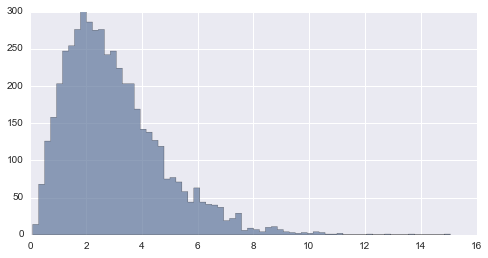

In [7]:
x = stats.gamma(3).rvs(5000)
plt.hist(x, 70, histtype='stepfilled', alpha=.7)

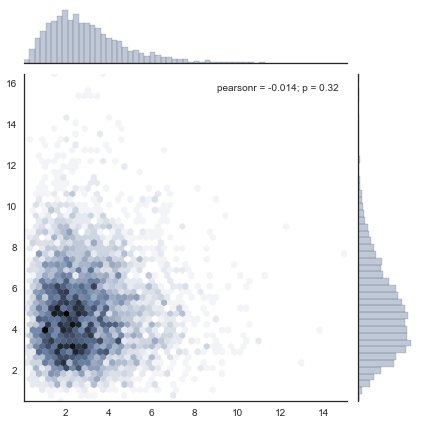

In [8]:
y = stats.gamma(5).rvs(5000)
with sns.axes_style('white'):
    sns.jointplot(x, y, kind='hex')

### estimating the density of the observations: `kdeplot` and `rugplot`

(0, 1)

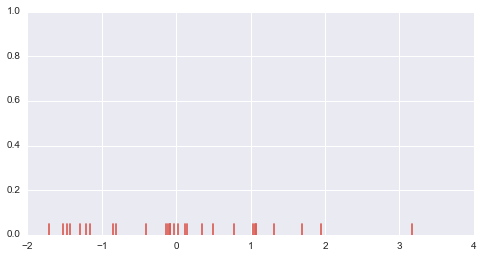

In [9]:
sns.set_palette('hls', 1)
data = randn(30)
sns.rugplot(data)
plt.ylim(0, 1)

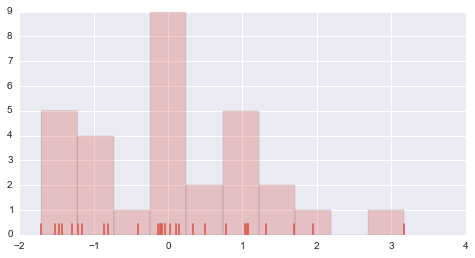

In [10]:
plt.hist(data, alpha=.3)
sns.rugplot(data)

a kernel density plot is also a transfromation form tick marks

to a height-encoded measure of density

represent each tick with a gaussian basic function

(0, 1)

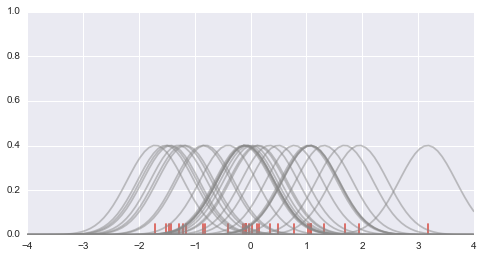

In [11]:
# draw the rug and set up the x-axis space
sns.rugplot(data)
xx = np.linspace(-4, 4, 100)

# compute the bandwidth of the kernel using a rule-of-thumb
bandwidth = ((4 * data.std() ** 5) / (3 * len(data))) ** .2
bandwidth = len(data) ** (-1. / 5)

# save function for next step
kernels = []

# plot each basic function
for d in data:
    
    # make basic function as a gaussian pdf
    kernel = stats.norm(d, bandwidth).pdf(xx)
    kernels.append(kernel)
    
    # scale for plotting
    kernel /= kernel.max()
    kernel *= .4
    plt.plot(xx, kernel, '#888888', alpha=.5)
plt.ylim(0, 1)

`scipy.stats` module has a function will perform a kernel density estimate

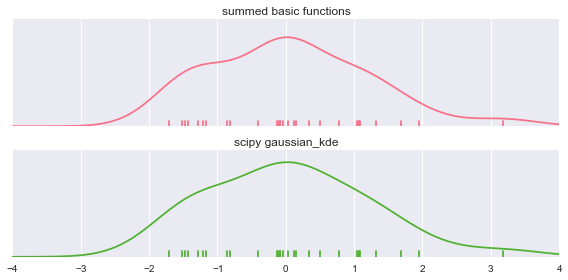

In [12]:
# set up the plots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
c1, c2 = sns.color_palette('husl', 3)[:2]

# plot the summed basic functions
summed_kde = np.sum(kernels, axis=0)
ax1.plot(xx, summed_kde, c=c1)
sns.rugplot(data, c=c1, ax=ax1)
ax1.set_yticks([])
ax1.set_title('summed basic functions')

# use scipy to get the density estimate
scipy_kde = stats.gaussian_kde(data)(xx)
ax2.plot(xx, scipy_kde, c=c2)
sns.rugplot(data, c=c2, ax=ax2)
ax2.set_yticks([])
ax2.set_title('scipy gaussian_kde')
f.tight_layout()

seaborn has a high-level function for kde plotting

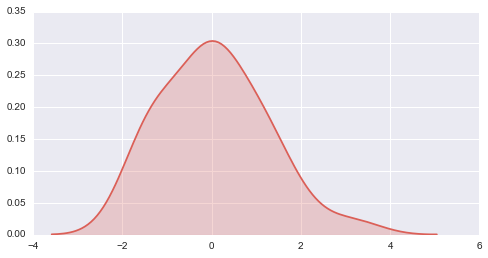

In [13]:
sns.kdeplot(data, shade=True)

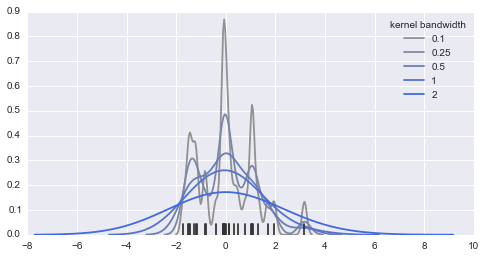

In [14]:
# like `bins` you can adjust `bandwidth` use `bw`
pal = sns.blend_palette([sns.desaturate('royalblue', 0), 'royalblue'], 5)
bws = [.1, .25, .5, 1, 2]

for bw, c in zip(bws, pal):
    sns.kdeplot(data, bw=bw, color=c, lw=1.8, label=bw)
    
plt.legend(title='kernel bandwidth')
sns.rugplot(data, color='#333333')

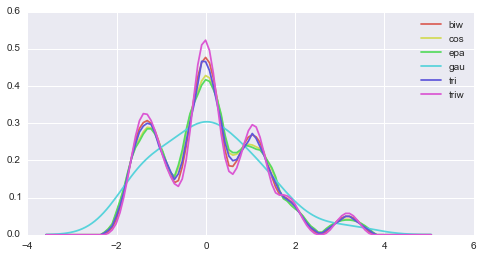

In [15]:
# gaussian kernel is most common
kernels = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
pal = sns.color_palette('hls', len(kernels))
for k, c in zip(kernels, pal):
    sns.kdeplot(data, kernel=k, color=c, label=k)
    
plt.legend()

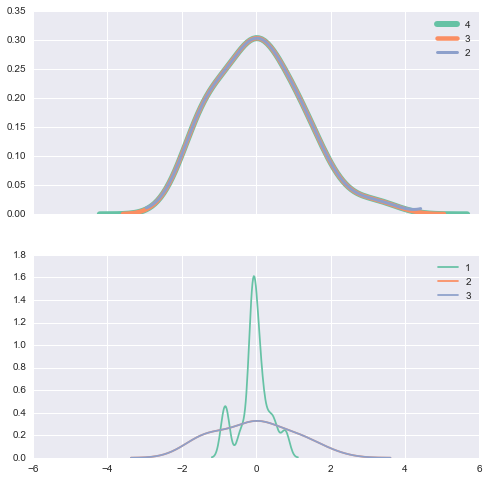

In [16]:
# `cut` influences only the range of the support
# `clip` affects the fitting of the kde
with sns.color_palette('Set2'):
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)
    for cut in [4, 3, 2]:
        sns.kdeplot(data, cut=cut, label=cut, lw=cut * 1.5, ax=ax1)
        
    for clip in [1, 2, 3]:
        sns.kdeplot(data, clip=(-clip, clip), label=clip, ax=ax2)

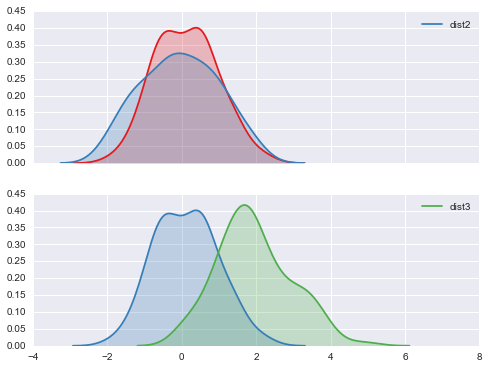

In [17]:
# legend
# providing a `label` keyword to `kdeplot`
# or pass an object (like a pandas series) with a `name` attribute
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)

dist1, dist2, dist3 = stats.norm(0, 1).rvs((3, 100))
dist3 = pd.Series(dist3 + 2, name='dist3')

# use `label`
sns.kdeplot(dist1, shade=True, color=c1, ax=ax1)
sns.kdeplot(dist2, shade=True, color=c2, label='dist2', ax=ax1)

# use `name`
sns.kdeplot(dist1, shade=True, color=c2, ax=ax2)
sns.kdeplot(dist3, shade=True, color=c3, ax=ax2)

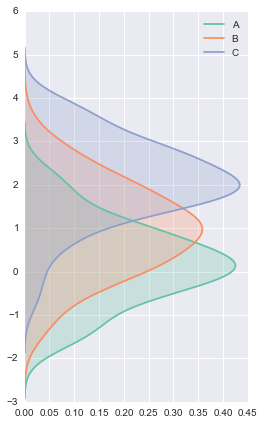

In [18]:
# `vertical` plot the density along the `y` axis
plt.figure(figsize=(4, 7))
data = stats.norm(0, 1).rvs((3, 100)) + np.arange(3)[:, None]

with sns.color_palette('Set2'):
    for d, label in zip(data, list('ABC')):
        sns.kdeplot(d, vertical=True, shade=True, label=label)

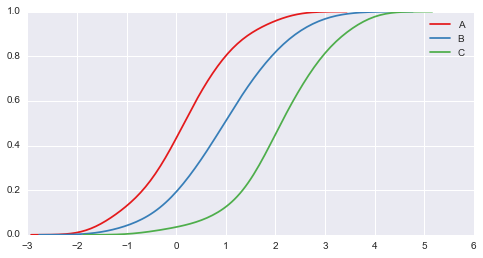

In [19]:
# use `kdeplot` to estimate the cumulative distribution function
with sns.color_palette('Set1'):
    for d, label in zip(data, list('ABC')):
        sns.kdeplot(d, cumulative=True, label=label)

### multivariate density estimation with `kdeplot`

use kernel density method with multidimensional data

if using 2d array or a DataFrame

the array is assumed to be shaped (`n_units`, `n_variables`)

In [20]:
data = np.random.multivariate_normal([0, 0], [[1, 2], [2, 20]], size=1000)
data = pd.DataFrame(data, columns=['X', 'Y'])
mpl.rc('figure', figsize=(6, 6))

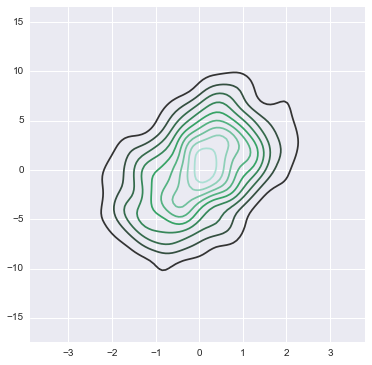

In [21]:
sns.kdeplot(data)

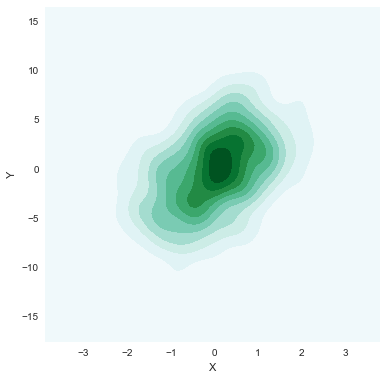

In [22]:
# pass in two vectors as the first positional arguments
# draw a bivariate density
sns.kdeplot(data.X, data.Y, shade=True)

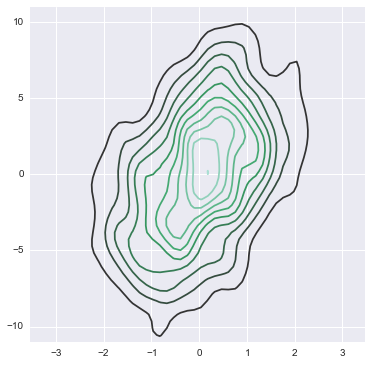

In [23]:
# only the gaussian kernel is availible for multidimensional kde
# colormap that end with `_d`
sns.kdeplot(data, bw='silverman', gridsize=50, cut=2, clip=(-11, 11), cmap='BuGn_d')

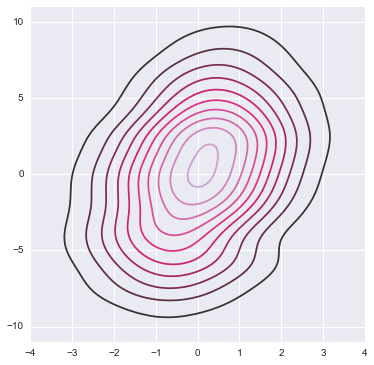

In [24]:
sns.kdeplot(data, bw=1, clip=[(-4, 4), (-11, 11)], cmap='PuRd_d')

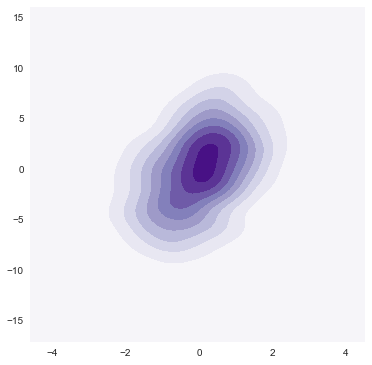

In [25]:
sns.kdeplot(data.values, shade=True, bw=(.5, 1), cmap='Purples')

### bivariate and univariate plots using `jointplot`

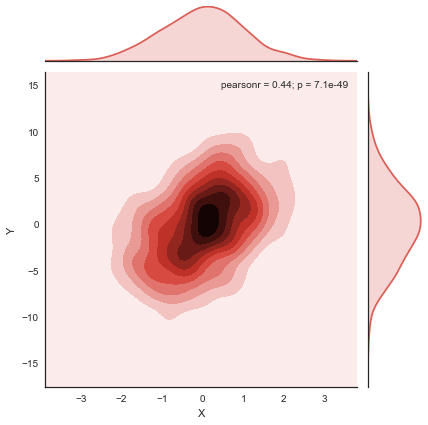

In [26]:
with sns.axes_style('white'):
    sns.jointplot('X', 'Y', data, kind='kde')

### combining plot styles `distplot`

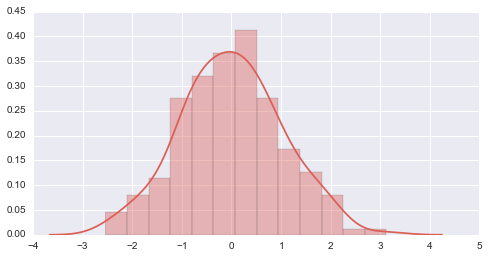

In [27]:
# combine multiple styles using `distplot`
# `distplot` provide one interface for plotting
# histograms, kernel density plots, rug plots
# and plotting fitted probability distributions

# default => kernel density over a histogram
sns.set_palette('hls')
mpl.rc('figure', figsize=(8, 4))
data = randn(200)
sns.distplot(data)

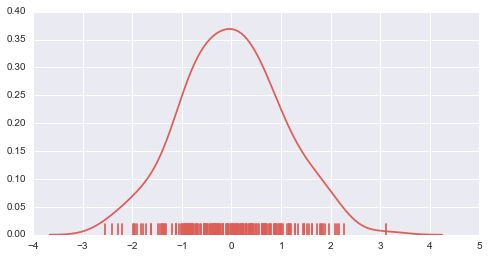

In [28]:
sns.distplot(data, rug=True, hist=False)

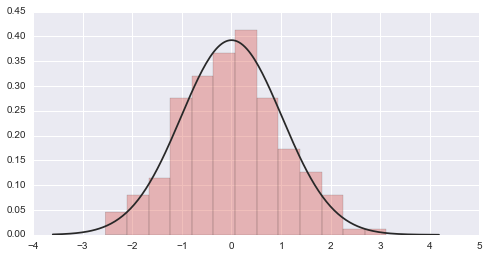

In [29]:
# pass a distribution family from `scipy.stats`
# `distplot` will fit the parameters using maximum likelihood
sns.distplot(data, kde=False, fit=stats.norm)

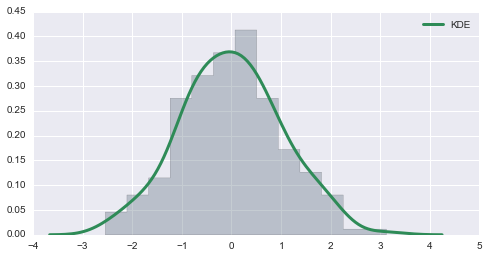

In [30]:
# pass keyword arguments to the `[plot]_kws` argument
# to control any of the underlying plots
sns.distplot(data, kde_kws={'color': 'seagreen',
                            'lw': 3,
                            'label': 'KDE'},
                   hist_kws={'histtype': 'stepfilled',
                             'color': 'slategray'})

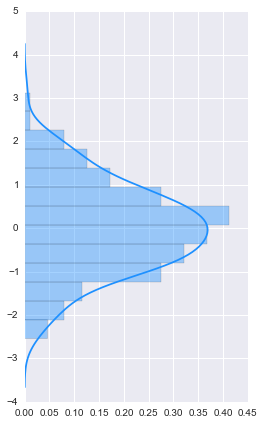

In [31]:
# draw vertically
plt.figure(figsize=(4, 7))
sns.distplot(data, color='dodgerblue', vertical=True)

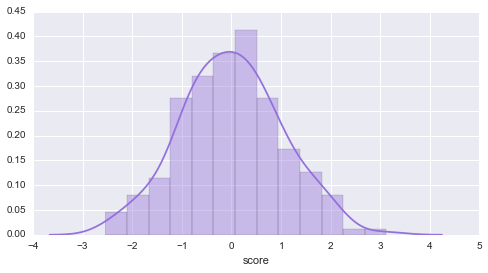

In [32]:
# `name` attribute will become the label
# `axlabel=Flase`
sns.distplot(pd.Series(data, name='score'), color='mediumpurple')

### comparing distributions `boxplot` and `violinplot`

In [33]:
sns.set(rc={'figure.figsize': (6, 6)})

{'boxes': [<matplotlib.lines.Line2D at 0x110793ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1107a0a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x1107abd90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1107ab750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x110793d50>,
  <matplotlib.lines.Line2D at 0x1107c3090>]}

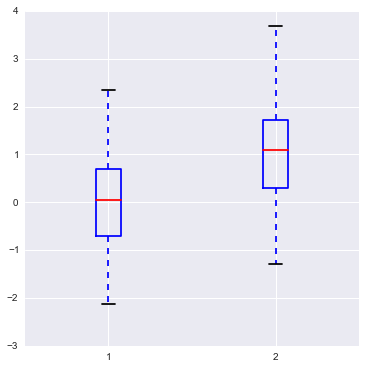

In [34]:
# `boxplot` function in matplotlib
data = [randn(100), randn(100) + 1]
plt.boxplot(data)

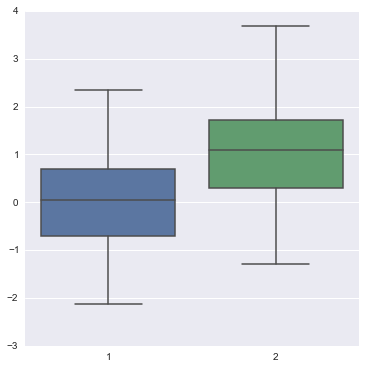

In [35]:
sns.boxplot(data)

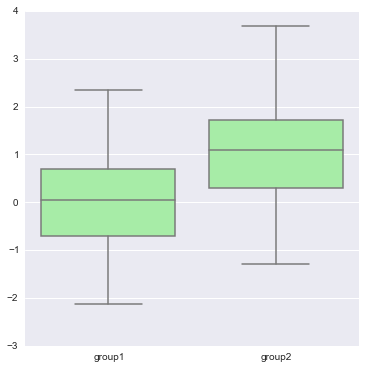

In [36]:
# `whiskers` extend to 1.5 * IRQ past the closest quartile
sns.boxplot(data, names=['group1', 'group2'], whis=np.inf, color='PaleGreen')

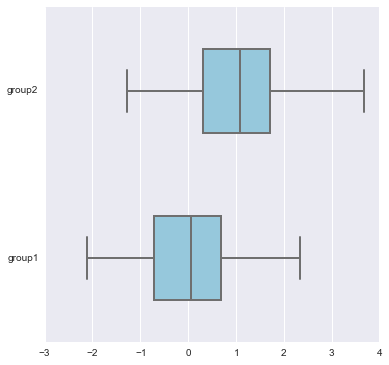

In [37]:
# `vert`
sns.boxplot(data, names=['group1', 'group2'],
            linewidth=2, widths=.5, color='skyblue', vert=False)

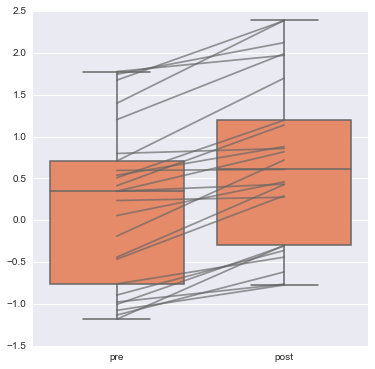

In [38]:
# plot repeated-measures data
# `join_rm`
pre = randn(25)
post = pre + np.random.rand(25)
sns.boxplot([pre, post], names=['pre', 'post'], color='coral', join_rm=True)

In [39]:
# violinplot
d1 = stats.norm(0, 5).rvs(100)
d2 = np.concatenate([stats.gamma(4).rvs(50),
                     -1 * stats.gamma(4).rvs(50)])
data = pd.DataFrame(dict(d1=d1, d2=d2))

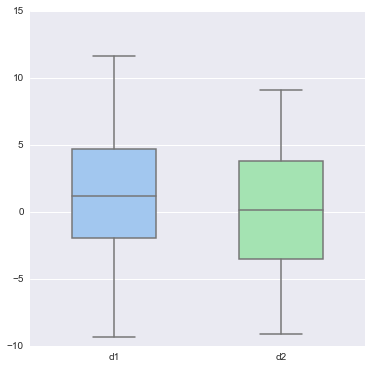

In [40]:
# draw a `boxplot`
sns.boxplot(data, color='pastel', widths=.5)

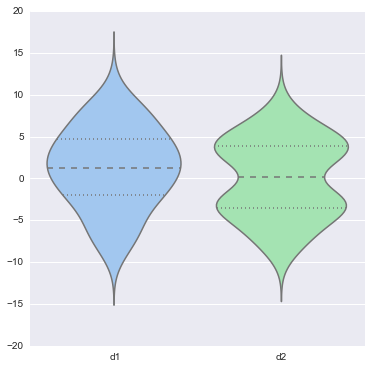

In [41]:
# based on above plot it looks like
# we basically have two sample from the same distribution
sns.violinplot(data, color='pastel')

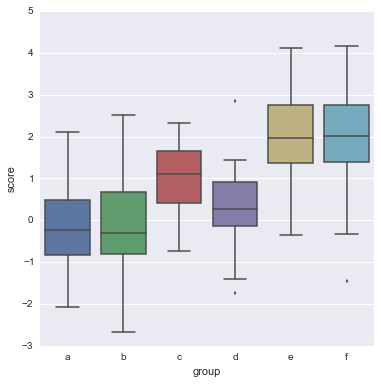

In [42]:
# the right is bimodal with peaks at +/-5
# both `boxplot` and `violinplot` can take pandas series object
y = np.random.randn(200)
g = np.random.choice(list('abcdef'), 200)
for i, l in enumerate('abckef'):
    y[g == l] += i // 2
df = pd.DataFrame(dict(score=y, group=g))
sns.boxplot(df.score, df.group)

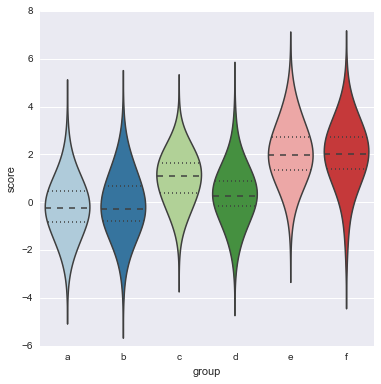

In [43]:
sns.violinplot(df.score, df.group, color='Paired', bw=1)

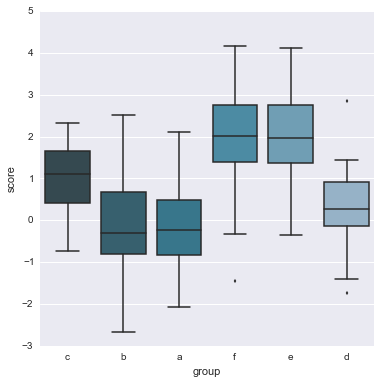

In [44]:
# using a groupby
# default => plot in the sorted order of the group labels
# override by
order = list('cbafed')
sns.boxplot(df.score, df.group, order=order, color='PuBuGn_d')

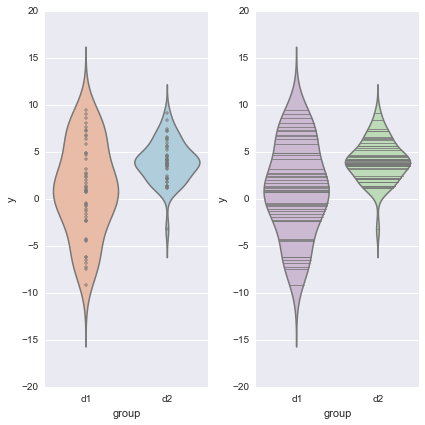

In [45]:
data = pd.melt(data.ix[:50], value_name='y', var_name='group')
f, (ax_l, ax_r) = plt.subplots(1, 2)
sns.violinplot(data.y, data.group, 'points', positions=[1, 2],
               color='RdBu', ax=ax_l)
sns.violinplot(data.y, data.group, 'stick', positions=[3, 4],
               color='PRGn', ax=ax_r)
plt.tight_layout()

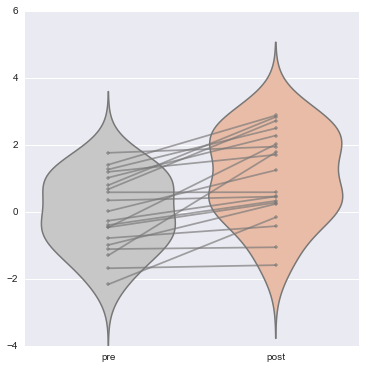

In [46]:
# `repeated-measures`
pre = randn(20)
data =pd.DataFrame(dict(pre=pre, post=pre + 1 + randn(20)),
                   columns=['pre', 'post'])
sns.violinplot(data, inner='points', join_rm=True, color='RdGy_r')

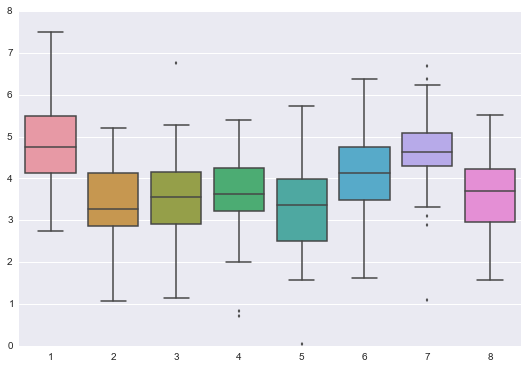

In [47]:
# using a palette colorschema
mpl.rc('figure', figsize=(9,6))
data = randn(50, 8) + np.random.uniform(3, 5, 8)
sns.boxplot(data)

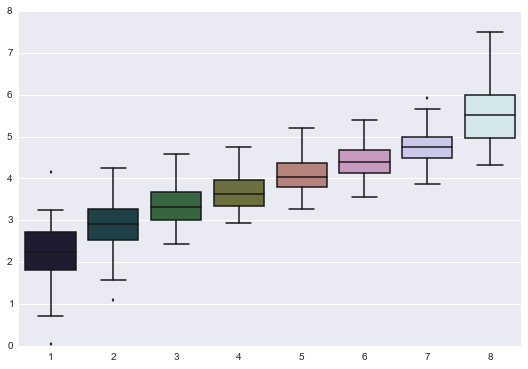

In [48]:
# ordering
data.sort(axis=1)
sns.boxplot(data, widths=.8, color='cubehelix')

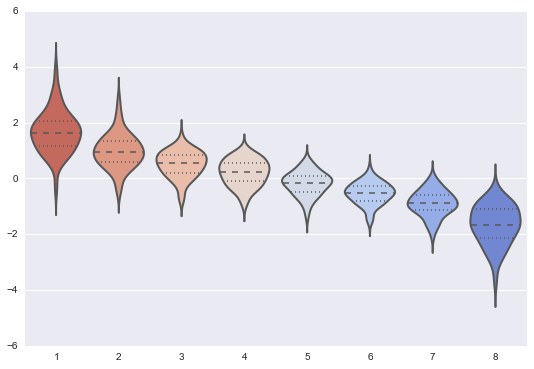

In [49]:
data = data * -1 + data.mean()
sns.violinplot(data, color='coolwarm_r', lw=2)